In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

from satforecast.data import data
from satforecast.modeling.data_selection import rolling_batch
from satforecast.modeling.train import train
from satforecast.data.viz import get_border_map

data.download()
image_dir = data.process_gs_rainfall_daily(scale=0.1)
image_files = data.get_files(image_dir, '*.npy')

In [2]:
class Normalization(nn.Module):
    def __init__():
        super().__init__()
        self.mean = torch.nn.Parameter(torch.as_tensor(mean))
        self.std = torch.nn.Parameter(torch.as_tensor(std))

    def forward(self, x):
        return (x - self.mean) / self.std

class ConvRNN(nn.Module):
    def __init__(self, in_channels, hidden_channels, kernal_size_, padding_):
        super().__init__()   
        self.hidden_channels = hidden_channels
        
        #self.norm = Normalization(mean, std)
        self.conv1 = nn.Conv2d(in_channels + hidden_channels, hidden_channels, kernel_size=kernal_size_, padding=padding_)
        self.conv2 = nn.Conv2d(hidden_channels, hidden_channels, kernel_size=kernal_size_, padding=padding_)
        self.conv3 = nn.Conv2d(hidden_channels, in_channels, kernel_size=kernal_size_, padding=padding_)

    def forward(self, x, h):
        #x = 
        h = torch.cat((x, h), dim=1)
        h = torch.tanh(self.conv1(h))
        h = torch.tanh(self.conv2(h))
        return self.conv3(h), h

    def init_hidden(self, batch_size, image_size):
        return torch.zeros(batch_size, self.hidden_channels, *image_size)

    def predict(self, X):
        seq_len = X.shape[1]
        
        hidden = self.init_hidden(X.shape[0], X.shape[-2:])

        for step in range(seq_len - 1):
            _, hidden = self.forward(X[:,step], hidden)

        pred, _ = self.forward(X[:, -1], hidden)
        return pred

Model will be saved to /home/jmlazaro/data_science/satellite-forecast/models/test_crnn_v0.7.pth
Time to make validation tensors: 0.004419088363647461
Size of X_val = 0.001GB , Size of y_val = 0.000GB 
Batch 0: Validation loss = 0.1667422205209732, Train time = 0.0, Update time = 0.0, Validation time = 0.0
Batch 1: Validation loss = 0.16012492775917053, Train time = 0.0, Update time = 0.0, Validation time = 0.0
Batch 2: Validation loss = 0.15373152494430542, Train time = 0.0, Update time = 0.0, Validation time = 0.0
Batch 3: Validation loss = 0.1475791037082672, Train time = 0.0, Update time = 0.0, Validation time = 0.0
Batch 4: Validation loss = 0.14165855944156647, Train time = 0.0, Update time = 0.0, Validation time = 0.0
Batch 5: Validation loss = 0.13596177101135254, Train time = 0.0, Update time = 0.0, Validation time = 0.0
Batch 0: Validation loss = 0.130489319562912, Train time = 0.0, Update time = 0.0, Validation time = 0.0
Batch 1: Validation loss = 0.12523052096366882, Train 

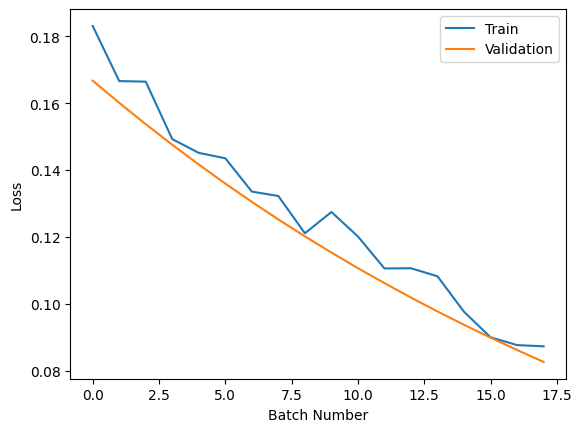

In [3]:
# Test run
TEST_N_IMAGES = 100
test_image_files = image_files[:TEST_N_IMAGES]
test_crnn = ConvRNN(in_channels=1, hidden_channels=2, kernal_size_=3, padding_=1)

train_loss, val_loss = train(
    model = test_crnn,
    model_name = 'test_crnn_v0',
    criterion = nn.MSELoss(),
    optimizer = torch.optim.Adam(test_crnn.parameters()),
    files_list = test_image_files,
    train_frac = 0.6,
    val_frac = 0.1,
    seq_len = 5,
    batch_size = 5,
    max_epochs = 3,
    val_level = 'batch',
    early_stopping = True,
    min_improv = 0.003,
    max_iter_improv = 1,
    shuffle = True,
    log_level = 1,
    save_model = False
)

plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Batch Number')
plt.ylabel('Loss');

## Semi-full training

Batch 0: Validation loss = 0.09355542063713074, Train time = 0.2, Update time = 0.4, Validation time = 0.3
Batch 1: Validation loss = 0.0911889374256134, Train time = 0.1, Update time = 0.3, Validation time = 0.3
Batch 2: Validation loss = 0.08893073350191116, Train time = 0.2, Update time = 0.3, Validation time = 0.2
Batch 3: Validation loss = 0.08679276704788208, Train time = 0.1, Update time = 0.3, Validation time = 0.2
Batch 4: Validation loss = 0.08476980030536652, Train time = 0.1, Update time = 0.3, Validation time = 0.2
Batch 5: Validation loss = 0.08286578953266144, Train time = 0.1, Update time = 0.3, Validation time = 0.2
Batch 6: Validation loss = 0.08102449029684067, Train time = 0.1, Update time = 0.3, Validation time = 0.2
Batch 7: Validation loss = 0.07925610989332199, Train time = 0.1, Update time = 0.3, Validation time = 0.2
Batch 8: Validation loss = 0.07758378982543945, Train time = 0.1, Update time = 0.2, Validation time = 0.2
Batch 9: Validation loss = 0.075987815

Batch 23: Validation loss = 0.03790247067809105, Train time = 0.1, Update time = 0.3, Validation time = 0.1
Batch 24: Validation loss = 0.03782361000776291, Train time = 0.1, Update time = 0.3, Validation time = 0.2
Batch 25: Validation loss = 0.03775855898857117, Train time = 0.1, Update time = 0.3, Validation time = 0.2
Batch 26: Validation loss = 0.037686657160520554, Train time = 0.1, Update time = 0.3, Validation time = 0.2
Batch 0: Validation loss = 0.03761722519993782, Train time = 0.2, Update time = 0.3, Validation time = 0.2
Batch 1: Validation loss = 0.03753003105521202, Train time = 0.1, Update time = 0.2, Validation time = 0.2
Batch 2: Validation loss = 0.03745754808187485, Train time = 0.1, Update time = 0.2, Validation time = 0.1
Batch 3: Validation loss = 0.03737223520874977, Train time = 0.1, Update time = 0.2, Validation time = 0.2
Batch 4: Validation loss = 0.037281110882759094, Train time = 0.1, Update time = 0.2, Validation time = 0.3
Batch 5: Validation loss = 0.03

Batch 18: Validation loss = 0.03487415239214897, Train time = 0.1, Update time = 0.3, Validation time = 0.2
Batch 19: Validation loss = 0.034876953810453415, Train time = 0.1, Update time = 0.2, Validation time = 0.1

!!! Early stopping triggered after 5 epochs and 20 batches !!!



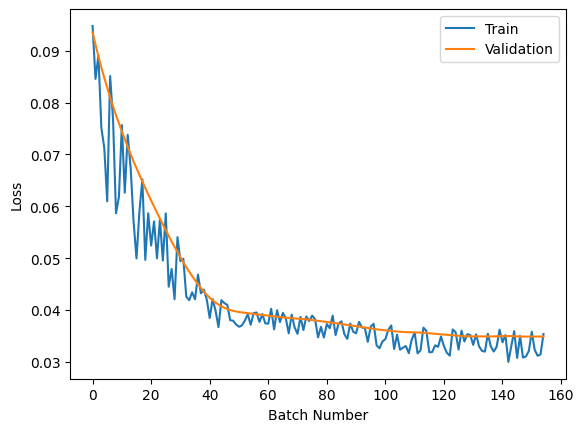

In [4]:
# Data constants
DEV_N_IMAGES = 2_000
TRAIN_FRAC = 0.95
VAL_FRAC = 0.05
SEQ_LEN = 5

# Model
dev_image_files = image_files[:DEV_N_IMAGES]
dev_crnn = ConvRNN(in_channels=1, hidden_channels=2, kernal_size_=3, padding_=1)
model_name = 'dev_crnn_v0'
crit = nn.MSELoss()
optim = torch.optim.Adam(dev_crnn.parameters())

# Training constants
BATCH_SIZE = 64
MAX_EPOCHS = 50
MIN_IMPROV = 0.001
MAX_ITER_IMPROV = 50

train_loss, val_loss = train(
    model = dev_crnn,
    model_name = model_name,
    criterion = crit,
    optimizer = optim,
    files_list = dev_image_files,
    train_frac = TRAIN_FRAC,
    val_frac = VAL_FRAC,
    seq_len = SEQ_LEN,
    batch_size = BATCH_SIZE,
    max_epochs = MAX_EPOCHS,
    val_level = 'batch',
    early_stopping = True,
    min_improv = MIN_IMPROV,
    max_iter_improv = MAX_ITER_IMPROV,
    shuffle = True,
    log_level = 1,
    save_model = True
)

plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Validation')
plt.legend()
plt.xlabel('Batch Number')
plt.ylabel('Loss');

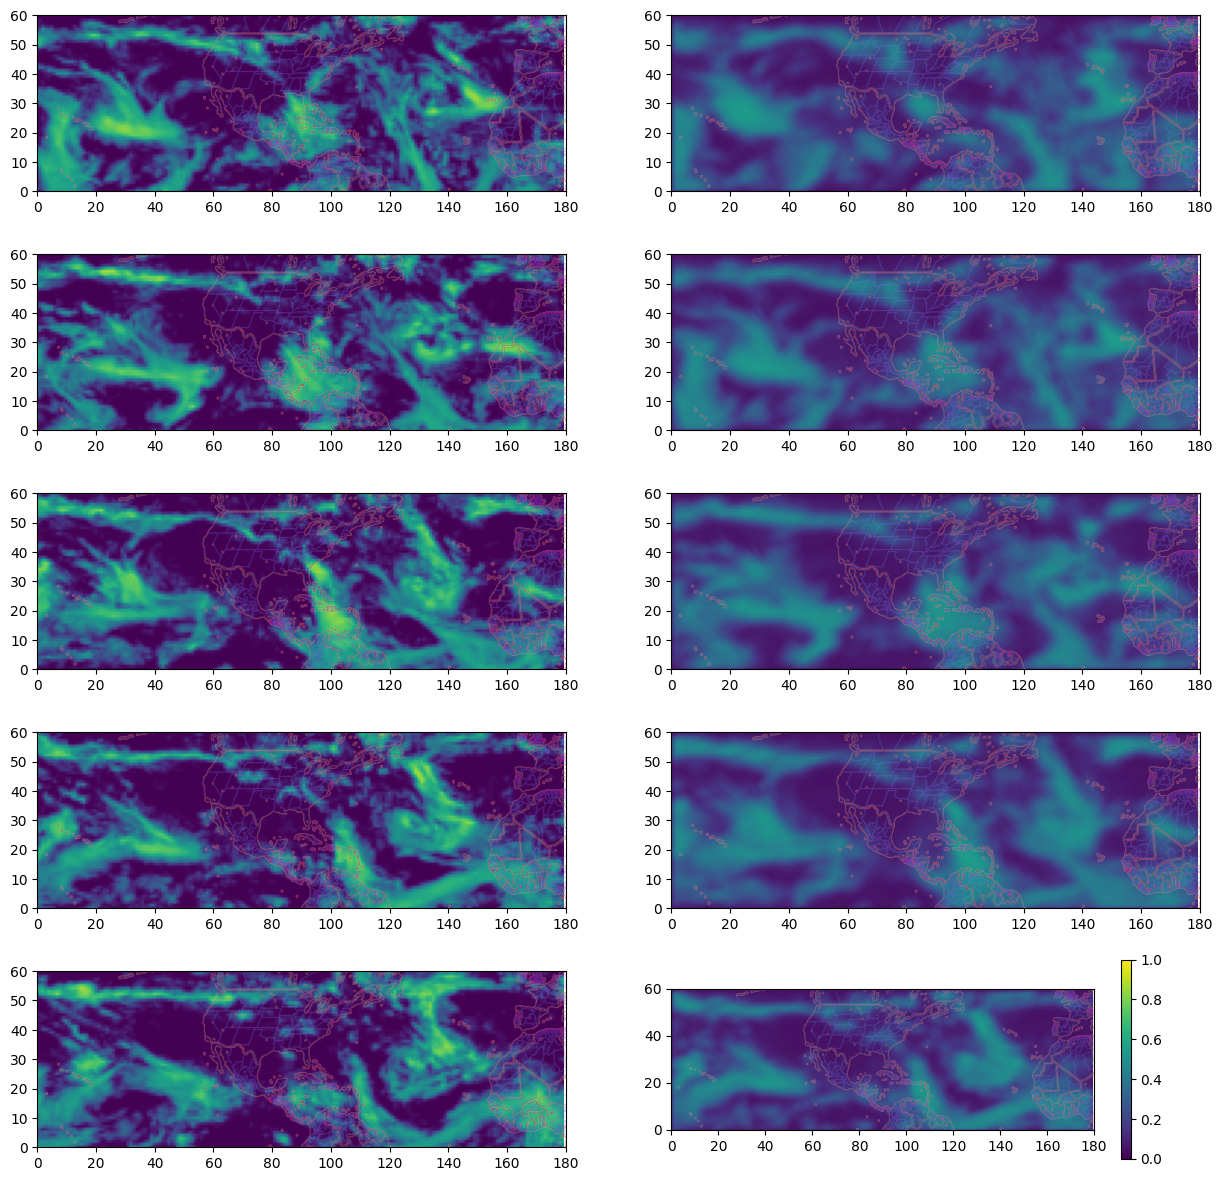

In [5]:
N_DAYS = 5
COLS = 2
IMAGE_SIZE = (60, 180)

bmap = plt.imread(get_border_map())

fig, axs = plt.subplots(N_DAYS, COLS, figsize=(15, 3*N_DAYS))

dev_crnn.eval()

for i in range(N_DAYS):

    # Get predicted
    X, y = rolling_batch(image_files[DEV_N_IMAGES + i: DEV_N_IMAGES + i + SEQ_LEN + 1], start=0, stop=SEQ_LEN + 1, seq_len=SEQ_LEN)
    y = torch.reshape(y, IMAGE_SIZE).numpy()
    y_pred = torch.reshape(dev_crnn.predict(X), IMAGE_SIZE).detach().numpy()

    # Plot real
    y_shape = y.shape
    plt.subplot(N_DAYS, COLS, i * COLS + 1)
    plt.imshow(y, vmin=0, vmax=1)
    plt.imshow(bmap, extent=[0, y_shape[1], 0, y_shape[0]])

    # Plot predicted
    plt.subplot(N_DAYS, COLS, i * COLS + 2)
    plt.imshow(y_pred, vmin=0, vmax=1)
    plt.imshow(bmap, extent=[0, y_shape[1], 0, y_shape[0]])

plt.colorbar();